In [13]:
import pandas as pd
import matplotlib 
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
df_houses = pd.read_csv("/content/drive/MyDrive/Ciências de dados rep/Regression/House_prices/houses_to_rent_v2.csv")

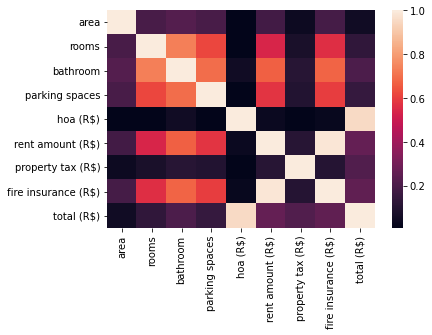

In [3]:
sns.heatmap(df_houses.corr())

In [4]:
le_city = preprocessing.LabelEncoder()
df_houses["city_le"] = le_city.fit_transform(df_houses["city"])
le_animal = preprocessing.LabelEncoder()
df_houses["animal_le"] = le_animal.fit_transform(df_houses["animal"])
le_furniture = preprocessing.LabelEncoder()
df_houses["furniture_le"] = le_furniture.fit_transform(df_houses["furniture"])


In [5]:
df_houses_le = df_houses[['city_le', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal_le', 'furniture_le', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)']]

df_houses_le.loc[df_houses_le["floor"] == "-","floor"] = 0
df_houses_le["floor"] = pd.to_numeric(df_houses_le["floor"])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [55]:
df_houses_le.corr().sort_values(by="total (R$)")

,city_le,area,rooms,bathroom,parking spaces,floor,animal_le,furniture_le,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
furniture_le,-0.108821,-0.008175,0.080694,-0.017938,0.004720,-0.105994,-0.087972,1.000000,-0.003413,-0.164235,-0.000985,-0.141768,-0.037781
animal_le,0.014299,-0.039626,-0.172190,-0.118255,-0.127432,0.021851,1.000000,-0.087972,0.022008,-0.067754,0.003006,-0.079152,0.007143
city_le,1.000000,-0.010785,-0.052523,0.084624,0.042645,0.114072,0.014299,-0.108821,-0.011029,0.188571,0.037493,0.148427,0.036058
floor,0.114072,-0.012724,-0.078687,0.004894,-0.020767,1.000000,0.021851,-0.105994,0.019872,0.073596,0.012626,0.013652,0.036431
area,-0.010785,1.000000,0.193796,0.226766,0.193983,-0.012724,-0.039626,-0.008175,0.006890,0.180742,0.039059,0.188078,0.051799
rooms,-0.052523,0.193796,1.000000,0.733763,0.617510,-0.078687,-0.172190,0.080694,0.007139,0.541758,0.075252,0.565148,0.134597
parking spaces,0.042645,0.193983,0.617510,0.697379,1.000000,-0.020767,-0.127432,0.004720,0.009321,0.578361,0.098378,0.597348,0.148684
bathroom,0.084624,0.226766,0.733763,1.000000,0.697379,0.004894,-0.118255,-0.017938,0.050271,0.668504,0.109253,0.676399,0.208339
property tax (R$),0.037493,0.039059,0.075252,0.109253,0.098378,0.012626,0.003006,-0.000985,0.007627,0.107884,1.000000,0.105661,0.218344
fire insurance (R$),0.148427,0.188078,0.565148,0.676399,0.597348,0.013652,-0.079152,-0.141768,0.029535,0.987343,0.105661,1.000000,0.254911


In [67]:
df_houses_complete_x = df_houses_le[['city_le', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal_le', 'furniture_le']]
df_houses_complete_y = df_houses_le[[ 'total (R$)']]
x_train_complete, x_test_complete, y_train_complete, y_test_complete = train_test_split(df_houses_complete_x, df_houses_complete_y, test_size = 0.30,random_state = 0)


df_houses_clean_x = df_houses_le[['rooms', 'bathroom', 'parking spaces','furniture_le']]
df_houses_clean_y = df_houses_le[[ 'total (R$)']]
x_train_clean, x_test_clean, y_train_clean, y_test_clean = train_test_split(df_houses_clean_x, df_houses_clean_y, test_size = 0.30,random_state = 0)


In [79]:
modelo_completo = LinearRegression()
modelo_completo.fit(x_train_complete,y_train_complete)
result_completo = modelo_completo.predict(x_test_complete)
mean_complete  = mean_absolute_error(result_completo, y_test_complete)

In [80]:
modelo_clean = LinearRegression()
modelo_clean.fit(x_train_clean,y_train_clean)
result_clean = modelo_clean.predict(x_test_clean)
mean_clean  = mean_absolute_error(result_clean, y_test_clean)

In [93]:
print("="*43+" Modelo Completo "+"="*43)
print("=="*10+"RMSE"+"=="*9+"Media  Previsão"+"=="*9+"Media Real"+"=="*9)
print("=="*9+"{:.2f}".format(mean_complete)+"=="*10+"{:.2f}".format(result_completo.mean())+"=="*12+"{:.2f}".format(y_test_complete.mean()[0])+"=="*10)
print("=="*51+"=")

=========================================== Modelo Completo ===========================================
====================RMSE==================Media  Previsão==================Media Real==================
==================2651.44====================6029.84========================5376.38====================


In [95]:
print("="*41+" Modelo Clean "+"="*42)
print("=="*9+"RMSE"+"=="*9+"Media Previsão"+"=="*9+"Media Real"+"=="*9)
print("=="*8+"{:.2f}".format(mean_clean)+"=="*10+"{:.2f}".format(result_clean.mean())+"=="*11+"{:.2f}".format(y_test_clean.mean()[0])+"=="*11)
print("=="*50)

========================================= Modelo Clean ==========================================
==================RMSE==================Media Previsão==================Media Real==================
================2449.98====================5733.20======================5376.38======================
